<a href="https://colab.research.google.com/github/shimer6565/Correlation-in-movie-s-dataset/blob/main/movieDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import io

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
# Uploading the csv file from our local 

from google.colab import files
uploaded = files.upload()

Saving moviesData.csv to moviesData.csv


In [ ]:
# Reading the data in a data frame and 

df = pd.read_csv(io.BytesIO(uploaded['moviesData.csv']))
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Looping through the columns to find whether any null / missing data is present

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
# Checking data types of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [ ]:
# Updating data types 

df['runtime'] = df['runtime'].astype('int64')

In [ ]:
# Since the values in the year column and releaded column mismatch in few rows
# we are creating a new column UpdatedYear with correct values

df['UpdatedYear'] = " "
for row in range(len(df)):
  ind1 = df['released'][row].find(",") + 2
  ind2 = df['released'][row].find("(") - 1
  df['UpdatedYear'][row] = df['released'][row][ind1:ind2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# Dropping duplicates(if any)
# Shows distinct records

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,UpdatedYear
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
1378,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
2286,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


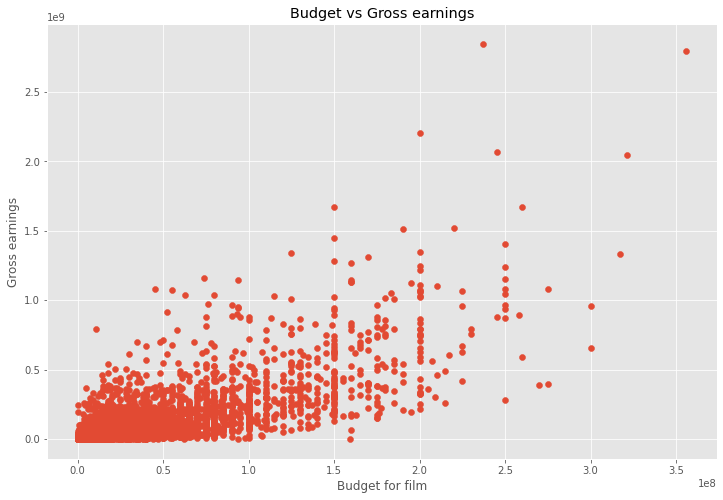

In [ ]:
# Scatter plot (Budget vs Gross)

plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross earnings")
plt.xlabel("Budget for film")
plt.ylabel("Gross earnings")
plt.show()

Text(0, 0.5, 'Gross earnings')

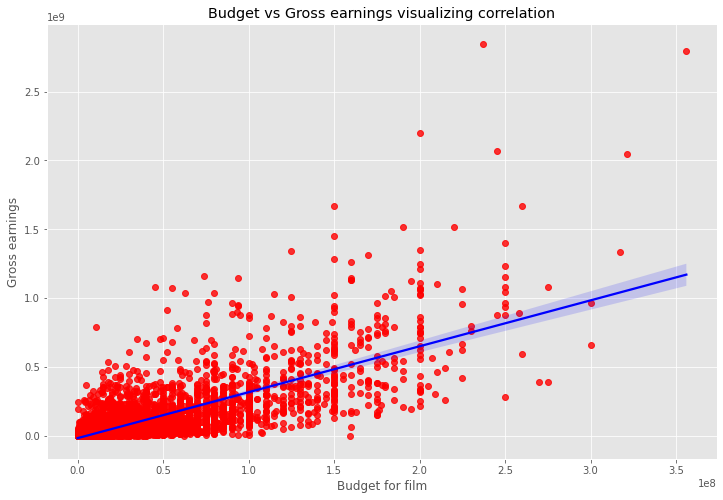

In [ ]:
# Plotting budget vs gross plot using regplot()

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("Budget vs Gross earnings visualizing correlation")
plt.xlabel("Budget for film")
plt.ylabel("Gross earnings")

This regplot() function from seaborn shows a positive correlation between budget and gross earnings of a movie

In [ ]:
# Correlation in our data set

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [ ]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


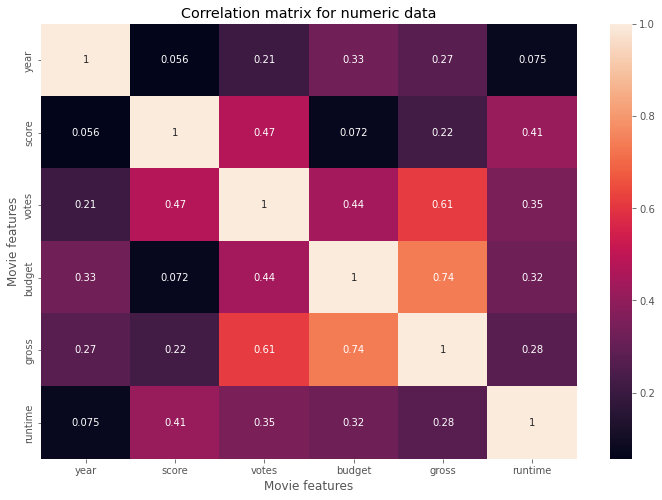

In [ ]:
# Visualizing correlation matrix in form of a heatmap

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for numeric data")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
df_numerized = df
for col in df_numerized.columns:
  if(df_numerized[col].dtype == 'object'):
    df_numerized[col] = df_numerized[col].astype('category')
    df_numerized[col] = df_numerized[col].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,UpdatedYear
3731,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,30
5302,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,40
1795,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,18
4730,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,36
5158,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,36
1378,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,15
2286,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,22
154,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,3


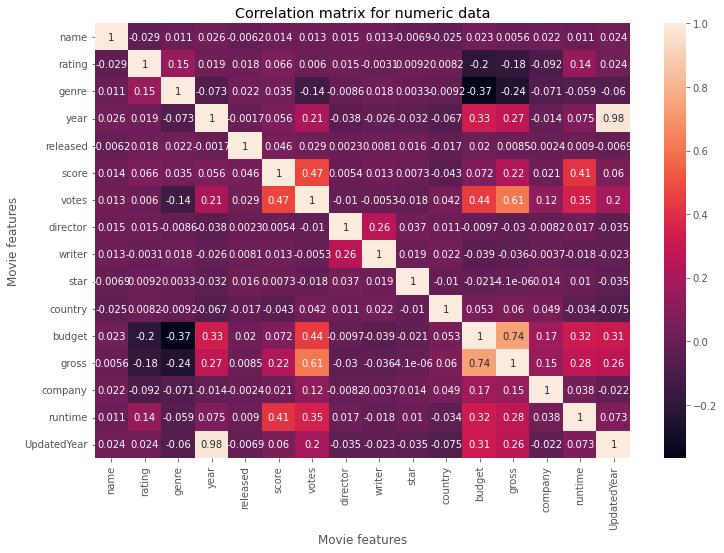

In [ ]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for numeric data")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,UpdatedYear
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.024411
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.024042
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.059910
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.983749
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.006893
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.059524
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.197645
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035291
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023341
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.034541


In [ ]:
correlation_matrix_numeric = df_numerized.corr()
correlation_pairs = correlation_matrix_numeric.unstack()
correlation_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             UpdatedYear    0.024411
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [ ]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
UpdatedYear  country       -0.074951
country      UpdatedYear   -0.074951
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
year         country       -0.066748
country      year          -0.066748
UpdatedYear  genre         -0.059910
genre        UpdatedYear   -0.059910
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
w

In [ ]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
UpdatedYear  year           0.983749
year         UpdatedYear    0.983749
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
UpdatedYear  UpdatedYear    1.000000
dtype: float64